In [14]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# Parameters

In [15]:
p_single_qubit_gate_error = 1e-4
cnot_error = 5e-3

# Helper methods

In [16]:
def n_ghz(n: int):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cnot(i, i+1)
    return qc

# Noise model

In [17]:
# Create an empty noise model
noise_model = NoiseModel()

error_gate1 = pauli_error([('X', p_single_qubit_gate_error), ('I', 1 - p_single_qubit_gate_error)])
cnot_pauli_error = pauli_error([('X', cnot_error), ('I', 1 - cnot_error)])
error_gate2 = cnot_pauli_error.tensor(cnot_pauli_error)

noise_model.add_all_qubit_quantum_error(error_gate1, ["x", "sx", "id"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
# noise_model.add_all_qubit_quantum_error(error_meas, "measure")

# # Add depolarizing error to all single qubit u1, u2, u3 gates
# error = depolarizing_error(0.05, 1)
# noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['sx', 'x', 'id', 'cx']
  All-qubits errors: ['x', 'sx', 'id', 'cx']


# Noisy Simulation

In [18]:
circ = n_ghz(4)
circ.measure_all()

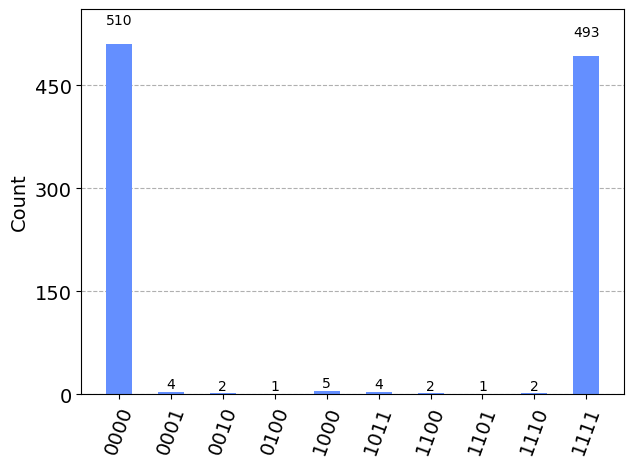

In [19]:
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts()

# Plot noisy output
plot_histogram(counts_bit_flip)